In [1]:
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import pandas as pd
import time

In [2]:
bases_regex = [r'^(10_)',r'^(10_|20_)',r'^(10_|20_|40_)',r'^(10_|20_|40_|60_)']
divergences_regex = [r'(_js)$',r'(_js|_r)$',r'(_js|_r|_t)$']
transforms_regex = [r'(fft)',r'(fft|dst)',r'(fft|dst|dct)',r'(fft|dst|dct|wt)',r'(fft|dst|dct|wt|lp)']

n_bases = 4
n_divergences = 3
n_transforms = 5

single_base = [[0] * n_transforms for _ in range(n_divergences)]
all_base = [[0] * n_transforms for _ in range(n_divergences)]
single_transform = [[0] * n_bases for _ in range(n_divergences)]
all_transform = [[0] * n_bases for _ in range(n_divergences)]
single_divergence = [[0] * n_transforms for _ in range(n_bases)]
all_divergence = [[0] * n_transforms for _ in range(n_bases)]

In [3]:
arts = ['art_nouveau', 'baroque', 'expressionism', 'impressionism', 'post_impressionism', 'realism', 'renaissance', 'romanticism', 'surrealism', 'ukiyo-e']

paths_train = []

for art in arts:
    path_fake_train = f'csv/art_nq2/train/AI_SD_{art}.csv'
    path_real_train = f'csv/art_nq2/train/{art}.csv'
    paths_train.extend([path_fake_train, path_real_train])


paths_test = []
for art in arts:
    path_fake_test = f'csv/art_nq2/test/AI_SD_{art}.csv'
    path_real_test = f'csv/art_nq2/test/{art}.csv'
    paths_test.extend([path_fake_test, path_real_test])

data_train = pd.concat([pd.read_csv(path, header=0) for path in paths_train], ignore_index=True)
data_test = pd.concat([pd.read_csv(path, header=0) for path in paths_test], ignore_index=True)

rf = RandomForestClassifier(n_estimators=100)

In [4]:
"""
Single base
"""

r1 = r'^(10_)'
for i in range(n_divergences):
    r2 = divergences_regex[i]
    for j in range(n_transforms):
        r3 = transforms_regex[j]
        regex = r1 + r'.*' + r3 + r'.*' + r2
        
        X_train = data_train.filter(regex=regex)
        y_train = data_train['label']
        X_test = data_test.filter(regex=regex)
        y_test = data_test['label']
        
        rf.fit(X_train, y_train)

        y_test_pred = rf.predict(X_test)

        test_accuracy = accuracy_score(y_test, y_test_pred)

        single_base[i][j] = test_accuracy
        

print(single_base)

[[0.7192, 0.7656, 0.92365, 0.92885, 0.93405], [0.76675, 0.76335, 0.92285, 0.92925, 0.93335], [0.76345, 0.7646, 0.9226, 0.92845, 0.93325]]


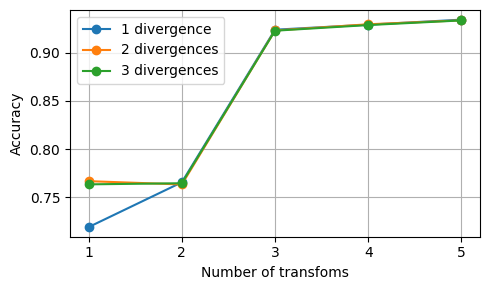

In [17]:
transforms = ['1', '2', '3', '4', '5']
divergences = ['1 divergence', '2 divergences', '3 divergences']

all_values = [val for row in single_base for val in row]
ymin = min(all_values) - 0.01
ymax = max(all_values) + 0.01

plt.figure(figsize=(5, 3))

for i in range(len(single_base)):
    plt.plot(transforms, single_base[i], marker='o', label=divergences[i])

#plt.title("Single base")
plt.xlabel("Number of transfoms")
plt.ylabel("Accuracy")
plt.ylim(ymin, ymax)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("single_base.jpg")
plt.show()

In [6]:
"""
All base
"""

r1 = r'^(10_|20_|40_|60_)'
for i in range(n_divergences):
    r2 = divergences_regex[i]
    for j in range(n_transforms):
        r3 = transforms_regex[j]
        regex = r1 + r3 + r2
        
        X_train = data_train.filter(regex=regex)
        y_train = data_train['label']
        X_test = data_test.filter(regex=regex)
        y_test = data_test['label']
        
        rf.fit(X_train, y_train)

        y_test_pred = rf.predict(X_test)

        test_accuracy = accuracy_score(y_test, y_test_pred)

        all_base[i][j] = test_accuracy
        

print(all_base)

[[0.9797, 0.98335, 0.9877, 0.98925, 0.98955], [0.97975, 0.9845, 0.9884, 0.9898, 0.98945], [0.9799, 0.98505, 0.9882, 0.9899, 0.9902]]


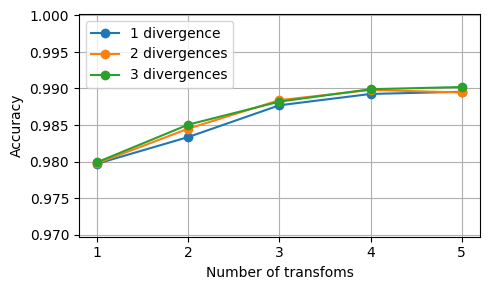

In [18]:
transforms = ['1', '2', '3', '4', '5']
divergences = ['1 divergence', '2 divergences', '3 divergences']

all_values = [val for row in all_base for val in row]
ymin = min(all_values) - 0.01
ymax = max(all_values) + 0.01

plt.figure(figsize=(5, 3))

for i in range(len(all_base)):
    plt.plot(transforms, all_base[i], marker='o', label=divergences[i])

#plt.title("All bases")
plt.xlabel("Number of transfoms")
plt.ylabel("Accuracy")
plt.ylim(ymin, ymax)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("accuracy_comparison/all_base.jpg")
plt.show()

In [8]:
"""
Single transform
"""

r1 = r'(fft)'
for i in range(n_divergences):
    r2 = divergences_regex[i]
    for j in range(n_bases):
        r3 = bases_regex[j]
        regex = r3 + r1 + r2
        
        X_train = data_train.filter(regex=regex)
        y_train = data_train['label']
        X_test = data_test.filter(regex=regex)
        y_test = data_test['label']

        rf.fit(X_train, y_train)

        y_test_pred = rf.predict(X_test)

        test_accuracy = accuracy_score(y_test, y_test_pred)

        single_transform[i][j] = test_accuracy
        

print(single_transform)

[[0.719, 0.91515, 0.96355, 0.97955], [0.7697, 0.9172, 0.9636, 0.9799], [0.76355, 0.91515, 0.9636, 0.9794]]


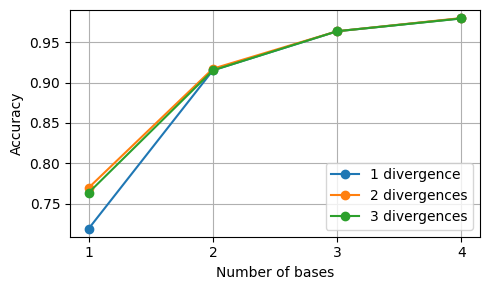

In [19]:
bases = ['1', '2', '3', '4']
divergences = ['1 divergence', '2 divergences', '3 divergences']

all_values = [val for row in single_transform for val in row]
ymin = min(all_values) - 0.01
ymax = max(all_values) + 0.01

plt.figure(figsize=(5, 3))

for i in range(len(single_transform)):
    plt.plot(bases, single_transform[i], marker='o', label=divergences[i])

#plt.title("Single transform")
plt.xlabel("Number of bases")
plt.ylabel("Accuracy")
plt.ylim(ymin, ymax)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("accuracy_comparison/single_transform.jpg")
plt.show()

In [10]:
"""
All transform
"""

r1 = r'(fft|dst|dct|wt|lp)'
for i in range(n_divergences):
    r2 = divergences_regex[i]
    for j in range(n_bases):
        r3 = bases_regex[j]
        regex = r3 + r1 + r2
        
        X_train = data_train.filter(regex=regex)
        y_train = data_train['label']
        X_test = data_test.filter(regex=regex)
        y_test = data_test['label']
        
        rf.fit(X_train, y_train)

        y_test_pred = rf.predict(X_test)

        test_accuracy = accuracy_score(y_test, y_test_pred)

        all_transform[i][j] = test_accuracy
        

print(all_transform)

[[0.9345, 0.97565, 0.98445, 0.9889], [0.93375, 0.97595, 0.98485, 0.9898], [0.9337, 0.97565, 0.98455, 0.9903]]


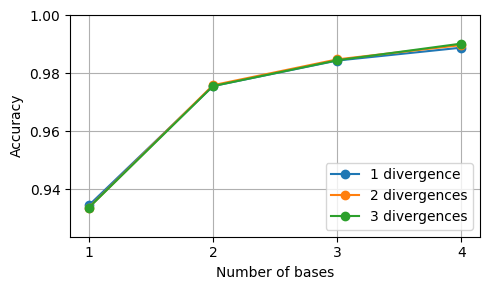

In [20]:
bases = ['1', '2', '3', '4']
divergences = ['1 divergence', '2 divergences', '3 divergences']

all_values = [val for row in all_transform for val in row]
ymin = min(all_values) - 0.01
ymax = max(all_values) + 0.01

plt.figure(figsize=(5, 3))

for i in range(len(all_transform)):
    plt.plot(bases, all_transform[i], marker='o', label=divergences[i])

#plt.title("All transforms")
plt.xlabel("Number of bases")
plt.ylabel("Accuracy")
plt.ylim(ymin, ymax)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("accuracy_comparison/all_transform.jpg")
plt.show()

In [12]:
"""
Single divergence
"""

r1 = r'(_js)$'
for i in range(n_bases):
    r2 = bases_regex[i]
    for j in range(n_transforms):
        r3 = transforms_regex[j]
        regex = r2 + r3 + r1
        
        X_train = data_train.filter(regex=regex)
        y_train = data_train['label']
        X_test = data_test.filter(regex=regex)
        y_test = data_test['label']

        rf.fit(X_train, y_train)

        y_test_pred = rf.predict(X_test)

        test_accuracy = accuracy_score(y_test, y_test_pred)

        single_divergence[i][j] = test_accuracy
        

print(single_divergence)

[[0.71885, 0.76545, 0.92465, 0.92915, 0.93365], [0.9161, 0.9223, 0.9665, 0.9719, 0.9759], [0.9637, 0.96865, 0.9778, 0.9832, 0.98425], [0.9794, 0.98355, 0.98775, 0.98965, 0.9892]]


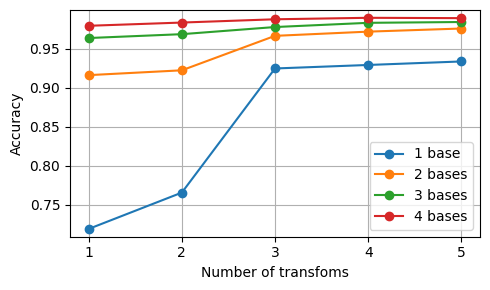

In [21]:
transforms = ['1', '2', '3', '4', '5']
bases = ['1 base', '2 bases', '3 bases', '4 bases']

all_values = [val for row in single_divergence for val in row]
ymin = min(all_values) - 0.01
ymax = max(all_values) + 0.01

plt.figure(figsize=(5, 3))

for i in range(len(single_divergence)):
    plt.plot(transforms, single_divergence[i], marker='o', label=bases[i])

#plt.title("Single divergence")
plt.xlabel("Number of transfoms")
plt.ylabel("Accuracy")
plt.ylim(ymin, ymax)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("accuracy_comparison/single_divergence.jpg")
plt.show()

In [14]:
"""
All divergence
"""

r1 = r'(_js|_r|_t)$'
for i in range(n_bases):
    r2 = bases_regex[i]
    for j in range(n_transforms):
        r3 = transforms_regex[j]
        regex = r2 + r3 + r1
        
        X_train = data_train.filter(regex=regex)
        y_train = data_train['label']
        X_test = data_test.filter(regex=regex)
        y_test = data_test['label']

        rf.fit(X_train, y_train)

        y_test_pred = rf.predict(X_test)

        test_accuracy = accuracy_score(y_test, y_test_pred)

        all_divergence[i][j] = test_accuracy
        

print(all_divergence)

[[0.76385, 0.7656, 0.92265, 0.9287, 0.9327], [0.9156, 0.92215, 0.9671, 0.9731, 0.97595], [0.96365, 0.969, 0.9778, 0.983, 0.98455], [0.97995, 0.98425, 0.9881, 0.9898, 0.9901]]


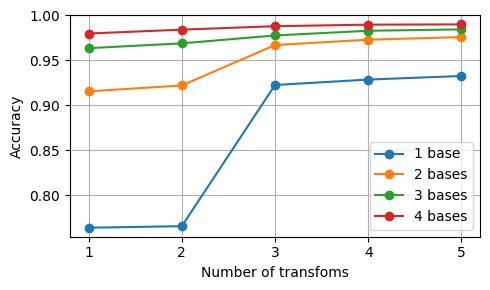

In [22]:
transforms = ['1', '2', '3', '4', '5']
bases = ['1 base', '2 bases', '3 bases', '4 bases']

all_values = [val for row in all_divergence for val in row]
ymin = min(all_values) - 0.01
ymax = max(all_values) + 0.01

plt.figure(figsize=(5, 3))

for i in range(len(all_divergence)):
    plt.plot(transforms, all_divergence[i], marker='o', label=bases[i])

#plt.title("All divergence")
plt.xlabel("Number of transfoms")
plt.ylabel("Accuracy")
plt.ylim(ymin, ymax)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("accuracy_comparison/all_divergence.jpg")
plt.show()

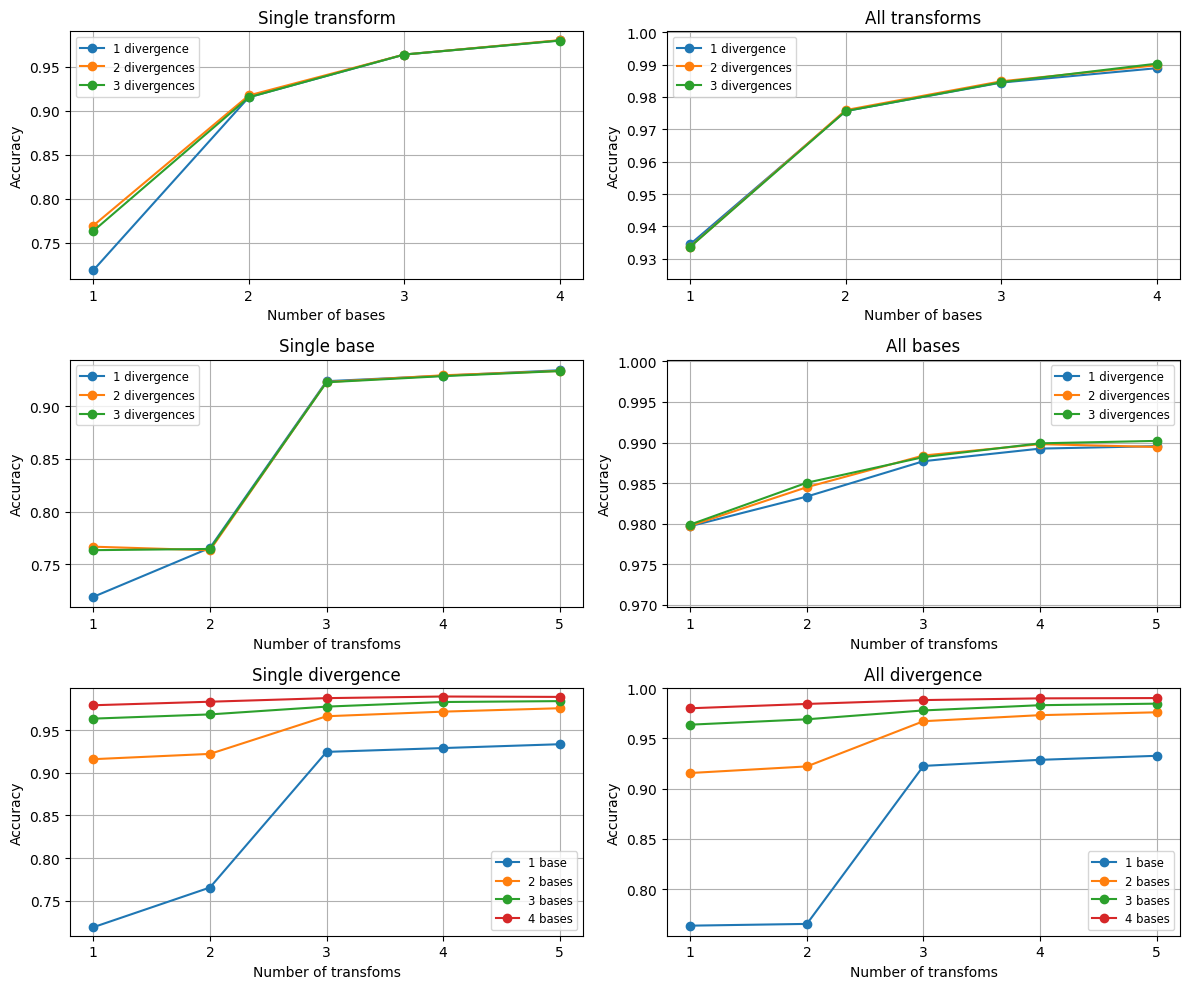

In [16]:
# Tu lista de datos
bases1 = ['1','2','3','4']
bases2 = ['1 base', '2 bases', '3 bases', '4 bases']
plots = [
    ("Single transform", bases1, single_transform, "Number of bases", divergences),
    ("All transforms", bases1, all_transform, "Number of bases", divergences),
    ("Single base", transforms, single_base, "Number of transfoms", divergences),
    ("All bases", transforms, all_base, "Number of transfoms", divergences),
    ("Single divergence", transforms, single_divergence, "Number of transfoms", bases2),
    ("All divergence", transforms, all_divergence, "Number of transfoms", bases2)
]

# Crear figura con 3 filas y 2 columnas
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()

# Graficar cada subplot
for idx, (title, x_labels, values, xlabel, legend_labels) in enumerate(plots):
    all_values = [val for row in values for val in row]
    ymin = min(all_values) - 0.01
    ymax = max(all_values) + 0.01

    for i in range(len(values)):
        axs[idx].plot(x_labels, values[i], marker='o', label=legend_labels[i])

    axs[idx].set_title(title)
    axs[idx].set_xlabel(xlabel)
    axs[idx].set_ylabel("Accuracy")
    axs[idx].set_ylim(ymin, ymax)
    axs[idx].grid(True)
    axs[idx].legend(fontsize='small')

plt.tight_layout()
plt.savefig("accuracy_comparison.jpg")
plt.show()